In [1]:
import pandas as pd
import warnings 
import numpy as np
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler


In [2]:
# !pip install scikit-learn-extra

In [3]:
from sklearn_extra.cluster import KMedoids

# 1. 결측치 확인

In [4]:
data = pd.read_csv('data/경감지표_전처리.csv')
data

,구,학교명,학교코드,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),위도,경도,법정동코드,500미터내_파출소개수,500미터내_CCTV개수
0,강남구,개포고등학교,S010000373,1,1,1,382.4,37.484959,127.059405,1168010300,0,44
1,강남구,경기고등학교,S010000375,1,0,1,152.4,37.517566,127.056074,1168010500,1,48
2,강남구,경기여자고등학교,S010000376,1,1,1,200.0,37.486887,127.065567,1168010300,0,40
3,강남구,국립국악고등학교,S000003540,0,0,0,217.4,37.476230,127.051476,1168010300,1,95
4,강남구,단국대학교부속소프트웨어고등학교,S010000581,0,1,0,300.0,37.495617,127.057767,1168010600,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...
315,성동구,무학여자고등학교,S010000436,1,1,1,253.3,37.556768,127.033599,1120010700,1,106
316,성동구,서울방송고등학교,S010000585,1,1,1,87.6,37.547773,127.011036,1120011300,1,68
317,성동구,성수고등학교,S010005523,1,1,1,406.6,37.547342,127.038253,1120011400,0,17
318,성동구,성수공업고등학교,S010000592,1,0,1,306.5,37.540540,127.051298,1120011500,1,78


In [5]:
data['학교명'].nunique()

320

In [6]:
data.isnull().sum()

구                         0
학교명                       0
학교코드                      0
내부상담_실시여부                 0
외부상담_실시여부                 0
wee클래스_운영여부               0
학교폭력_예방교육_평균교육시간(1학급당)    0
위도                        0
경도                        0
법정동코드                     0
500미터내_파출소개수              0
500미터내_CCTV개수             0
dtype: int64

In [7]:
data.corr()

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),위도,경도,법정동코드,500미터내_파출소개수,500미터내_CCTV개수
내부상담_실시여부,1.000000,0.114900,0.448199,0.066239,0.068815,0.140818,-0.072632,-0.018734,-0.078594
외부상담_실시여부,0.114900,1.000000,0.072714,0.004834,-0.050025,-0.059893,0.042727,-0.036731,-0.026904
wee클래스_운영여부,0.448199,0.072714,1.000000,-0.015808,-0.029889,0.160353,0.089563,-0.045707,0.015084
학교폭력_예방교육_평균교육시간(1학급당),0.066239,0.004834,-0.015808,1.000000,0.008040,-0.066443,0.007803,0.015936,0.035022
위도,0.068815,-0.050025,-0.029889,0.008040,1.000000,0.199688,-0.610467,0.172416,-0.301614
경도,0.140818,-0.059893,0.160353,-0.066443,0.199688,1.000000,0.027491,0.033421,-0.189380
법정동코드,-0.072632,0.042727,0.089563,0.007803,-0.610467,0.027491,1.000000,-0.313776,0.130682
500미터내_파출소개수,-0.018734,-0.036731,-0.045707,0.015936,0.172416,0.033421,-0.313776,1.000000,-0.015661
500미터내_CCTV개수,-0.078594,-0.026904,0.015084,0.035022,-0.301614,-0.189380,0.130682,-0.015661,1.000000


# 2. K-medoid 모델링

data파일을 복사하기

In [8]:
df = data.copy()

In [9]:
labels= np.array(df['학교명'])

In [10]:
school_info = df[['학교명','구']]

In [11]:
school_info['학교명'].nunique()

320

In [12]:
school_info

,학교명,구
0,개포고등학교,강남구
1,경기고등학교,강남구
2,경기여자고등학교,강남구
3,국립국악고등학교,강남구
4,단국대학교부속소프트웨어고등학교,강남구
...,...,...
315,무학여자고등학교,성동구
316,서울방송고등학교,성동구
317,성수고등학교,성동구
318,성수공업고등학교,성동구


In [13]:
total=df.loc[:,['내부상담_실시여부','외부상담_실시여부','wee클래스_운영여부','학교폭력_예방교육_평균교육시간(1학급당)','500미터내_파출소개수','500미터내_CCTV개수']]
total

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수
0,1,1,1,382.4,0,44
1,1,0,1,152.4,1,48
2,1,1,1,200.0,0,40
3,0,0,0,217.4,1,95
4,0,1,0,300.0,0,87
...,...,...,...,...,...,...
315,1,1,1,253.3,1,106
316,1,1,1,87.6,1,68
317,1,1,1,406.6,0,17
318,1,0,1,306.5,1,78


## 데이터 표준화

In [14]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels

In [15]:
total_sd.head()

,0,1,2,3,4,5
개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696
경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648
경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745
국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420
단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323


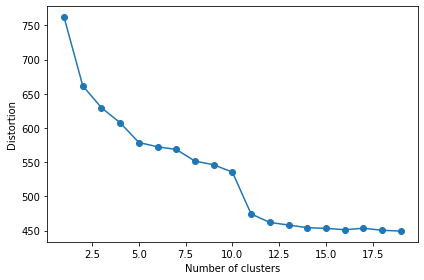

In [16]:
dist =[]
for i in range(1,20):
    k = KMedoids(n_clusters=i, random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

k = 4으로 지정

## 군집화

In [17]:
np.random.seed(1234)

In [18]:
total_sd_arr = total_sd.values

#k값을 4로 설정 후 k-means에 적용시키기
kmedoids = KMedoids(n_clusters =5,random_state=2021).fit(total_sd_arr)
kmedoids.cluster_centers_


array([[ 0.3992747 ,  0.56291423,  0.54846423, -0.49096501, -0.85136105,
        -0.39669619],
       [ 0.3992747 ,  0.56291423,  0.54846423,  0.3876927 ,  0.56022203,
        -0.46123243],
       [ 0.3992747 ,  0.56291423,  0.54846423,  1.81498931,  0.56022203,
         0.42076283],
       [ 0.3992747 ,  0.56291423,  0.54846423, -0.23892532, -0.85136105,
         1.60392719],
       [ 0.3992747 ,  0.56291423,  0.54846423, -0.58704644,  0.56022203,
        -0.09552708]])

In [19]:
total_sd['cluster'] = kmedoids.labels_
total_sd

,0,1,2,3,4,5,cluster
개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,0
경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4
경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,0
국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,4
단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,0
...,...,...,...,...,...,...,...
무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,4
서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,4
성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,0
성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4


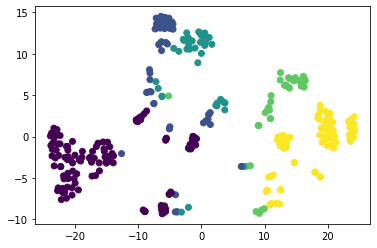

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(total_sd.iloc[:,:8])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmedoids.labels_)

plt.show()

In [21]:
total_sd.reset_index(inplace=True)
total_sd.rename(columns={'index': '학교명', 0: '내부상담_실시여부', 1: '외부상담_실시여부', 2: 'wee클래스_운영여부',
                         3: '학교폭력_예방교육_평균교육시간(1학급당)', 4: '500미터내_파출소개수', 5: '500미터내_CCTV개수'}, inplace=True)
total_sd

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,0
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,0
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,4
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,0
...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,4
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,4
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,0
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4


In [22]:
total_sd['cluster'].value_counts()
final = pd.merge(total_sd,school_info,on='학교명',how='left')
final.head()

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster,구
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,0,강남구
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4,강남구
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,0,강남구
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,4,강남구
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,0,강남구


In [23]:
final = pd.merge(total_sd,school_info,on='학교명',how='inner')
# final.head()

In [24]:
final

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster,구
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,0,강남구
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4,강남구
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,0,강남구
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,4,강남구
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,0,강남구
...,...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,4,성동구
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,4,성동구
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,0,성동구
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4,성동구


In [25]:
final.groupby('cluster').mean()

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수
cluster,,,,,,
0,-0.001252,0.179739,0.037314,-0.379656,-0.851361,-0.429706
1,0.114587,-0.079270,-0.195610,0.525289,0.781647,-0.479370
2,0.163830,-0.006125,0.099757,2.062278,0.026110,0.243434
3,-0.098522,-0.239160,0.006353,-0.243769,-0.569044,2.061827
4,-0.102619,-0.101355,0.021412,-0.623728,0.961042,-0.084904


In [26]:
final[final['cluster']==0].groupby('구').sum()

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster
구,,,,,,,
강남구,-8.929234,5.541415,-4.180187,-3.542339,-11.919055,-4.133949,0
강동구,-0.508168,3.377485,3.290785,-3.111844,-5.108166,-4.768018,0
강서구,-0.108893,-0.738368,-0.904225,-2.474548,-5.959527,-2.196047,0
관악구,0.399275,0.562914,0.548464,-0.775032,-0.851361,0.227154,0
광진구,-2.504541,0.562914,-1.823273,-0.297062,-0.851361,-0.160063,0
구로구,-1.415610,-0.826095,-5.825579,-6.041158,-9.364971,-7.461398,0
금천구,0.399275,0.562914,0.548464,0.109196,-0.851361,0.076570,0
노원구,3.593472,-4.291307,4.936178,-3.846374,-7.662249,-4.538309,0
도봉구,1.197824,1.688743,1.645393,-1.007457,-2.554083,-0.006924,0
